In [123]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt, gridspec
from qpms import EpsMuGenerator, lorentz_drude, unitcell, eV, hbar, BaseSpec, CTMatrix, Particle, pi
from matplotlib.colors import BoundaryNorm, Normalize
eh = eV/hbar
ccycle=plt.rcParams['axes.prop_cycle'].by_key()['color']

In [10]:
# I only need to build a valid unitcell to use its empty_lattice_modes method
px = 580e-9
py = px

a1 = np.array([px, 0])
a2 = np.array([0, py])

bspec = BaseSpec(lMax=3)
tm = CTMatrix(bspec, None)
emg = EpsMuGenerator(lorentz_drude['Au'])
pp = Particle((0,0), tm, r=50e-9, material=emg)
u = unitcell(a1, a2, [pp])


In [45]:
fn = 10
kxs = np.linspace(0, pi/px)
emptyfreqs = np.empty(kxs.shape+(fn,))
for i, kx in enumerate(kxs):
    emptyfreqs[i,:] = u.empty_lattice_modes((kx,0),3*eh)[:fn]
emptykappas = u.omega2k(emptyfreqs)
mykx = 0.2*pi/px

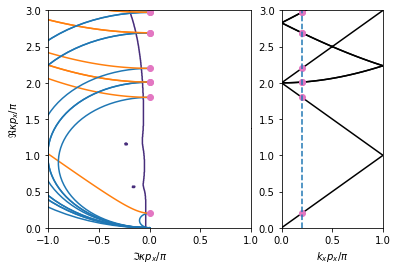

In [132]:
f = plt.figure()
gspec = f.add_gridspec(ncols=2, nrows=1, width_ratios=[2,1],
                      #    height_ratios=heights
                      )
ax = f.add_subplot(gspec[0,1])
for i in range(fn):
    ax.plot(kxs * px / pi, emptykappas[:,i] * px / pi, c='k')
    ax.plot(mykx * px / pi, 
            u.omega2k(u.empty_lattice_modes((mykx,0),3*eh)[i]) * px / pi,
            marker='o', c=ccycle[6])
ax.axvline(mykx * px / pi, ls='--')
ax.set_xlim([0,1])
ax.set_ylim([0,3])
ax.set_ylabel('$\\kappa p_x / \\pi$')
ax.set_xlabel('$k_x p_x / \\pi$')


# branch cut image
mybetas = u.omega2k(u.empty_lattice_modes((mykx, 0), 3*eh))[:fn]
angles = np.linspace(pi,2*pi)
# branch cuts due to the 'lilgamma' function
gammacuts[:,:] = mybetas[:,None]*0.5*(1 + np.exp(1j*angles[None,:]))
# branch cuts due to incomplete Γ
gci = np.linspace(0, -1) * pi / px
Gammacuts =  1j*gci[None,:] + (np.sqrt(mybetas[:, None]**2+gci[None,:]**2))

gr = np.linspace(0, 3, num=500) * pi / px
gi = np.linspace(-1.0, 0,num=400) * pi / px
gr, gi = np.meshgrid(gr, gi)
g = gr + 1j*gi
eps = np.empty(g.shape, dtype=complex)
for i in np.ndindex(g.shape):
    eps[i] = emg(u.k2omega(g[i])).n#em['eps']

ax = f.add_subplot(gspec[0,0])
for i in range(fn):
    ax.plot(gammacuts[i].imag * px / pi, gammacuts[i].real * px / pi, c=ccycle[0])
    ax.plot(Gammacuts[i].imag * px / pi, Gammacuts[i].real * px / pi, c=ccycle[1])
    ax.plot(0, 
            u.omega2k(u.empty_lattice_modes((mykx,0),3*eh)[i]) * px / pi,
            marker='o', c=ccycle[6])
ax.contour(g.imag * px / pi, g.real * px / pi, eps.imag)
#cax = ax.pcolormesh(g.imag * px / pi, g.real * px / pi, eps.imag, cmap = plt.get_cmap('plasma'), norm = Normalize(vmin=-5, vmax=5, clip=True))
ax.set_xlim([-1,1])
ax.set_ylim([0,3])
ax.set_ylabel('$\\Re\\kappa p_x / \\pi$')
ax.set_xlabel('$\\Im\\kappa p_x / \\pi$')
f.savefig("ewald_branchcuts.pdf")